In [273]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import concurrent.futures as cf
import pickle
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import  accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import utils as ut

In [4]:
X_train=pd.read_csv("C:/Users/Joni/Desktop/portfolio/Data analisys/the bridge data sci/american express/scripts/process_X_train.csv").iloc[:,1:]
y_train=pd.read_csv("C:/Users/Joni/Desktop/portfolio/Data analisys/the bridge data sci/american express/scripts/process_y_train.csv").iloc[:,1:]
X_test=pd.read_csv("C:/Users/Joni/Desktop/portfolio/Data analisys/the bridge data sci/american express/scripts/process_X_test.csv").iloc[:,1:]
y_test=pd.read_csv("C:/Users/Joni/Desktop/portfolio/Data analisys/the bridge data sci/american express/scripts/process_y_test.csv").iloc[:,1:]
X_great=pd.read_csv("C:/Users/Joni/Desktop/portfolio/Data analisys/the bridge data sci/american express/scripts/process_X_great.csv").iloc[:,1:]
y_great=pd.read_csv("C:/Users/Joni/Desktop/portfolio/Data analisys/the bridge data sci/american express/scripts/process_y_great.csv").iloc[:,1:]

In [47]:
path="C:/Users/Joni/Desktop/portfolio/Data analisys/the bridge data sci/american express/models/"

In [323]:
with open(path+"lr_ac_final.model","rb") as model1:
    lr_ac=pickle.load(model1)
with open(path+"lr_pre_final.model","rb") as model1:
    lr_pr_at=pickle.load(model1)
with open(path+"lr_re_final.model","rb") as model1:
    lr_re_at=pickle.load(model1)
with open(path+"lr_ac_at_final.model","rb") as model1:
    lr_ac_at=pickle.load(model1)
with open(path+"lr_pr_at_final.model","rb") as model1:
    lr_pre=pickle.load(model1)
with open(path+"lr_re_at_final.model","rb") as model1:
    lr_re=pickle.load(model1)
with open(path+"rfc_ac_final.model","rb") as model1:
    rfc_ac=pickle.load(model1)
with open(path+"rfc_re_final.model","rb") as model1:
    rfc_re=pickle.load(model1)
with open(path+"rfc_pr_final.model","rb") as model1:
    rfc_pr=pickle.load(model1)
with open(path+"dictator.model","rb") as model:
    voting=pickle.load(model)
with open(path+"democracy.model","wb") as model:
    voting_soft=pickle.load(model)

In [328]:
pre_lr_ac=lr_ac.predict(X_train)
pre_lr_pre=lr_pre.predict(X_train)
pre_lr_re=lr_re.predict(X_train)
pre_lr_ac_at=lr_ac_at.predict(X_train)
pre_lr_pr_at=lr_pr_at.predict(X_train)
pre_lr_re_at=lr_re_at.predict(X_train)
pre_rfc_ac=rfc_ac.predict(X_train)
pre_rfc_re=rfc_re.predict(X_train)
pre_rfc_pr=rfc_pr.predict(X_train)
preds_net=history.model.predict(X_train).round().astype("int64").reshape(1,-1)[0]
pre_dic=voting.predict(X_train)
pre_dem=voting_soft.predict(X_train)

509/509 [==============================] - 1s 2ms/step


<AxesSubplot: >

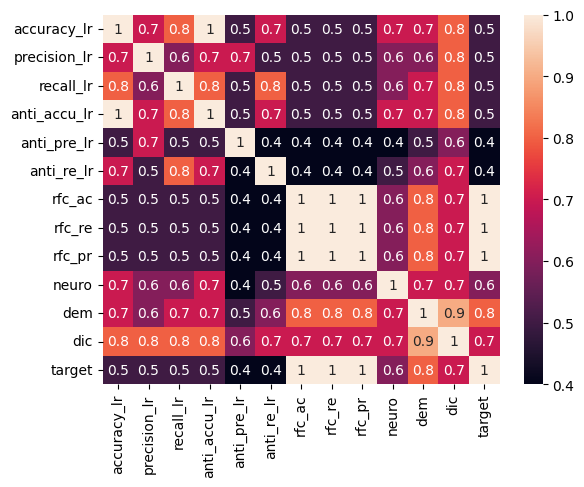

In [329]:
pred_train=pd.DataFrame({"accuracy_lr":pre_lr_ac,"precision_lr":pre_lr_pre,"recall_lr":pre_lr_re,
"anti_accu_lr":pre_lr_ac_at,"anti_pre_lr":pre_lr_pr_at,"anti_re_lr":pre_lr_re_at,
"rfc_ac":pre_rfc_ac,"rfc_re":pre_rfc_re,"rfc_pr":pre_rfc_pr,"neuro":preds_net,
"dem":pre_dem,"dic":pre_dic,"target":np.array(y_train).reshape(1,-1)[0]})
sns.heatmap(pred_train.corr().round(1),annot=True)

In [371]:
def make_table(y_train,X_train):
    return pd.concat([pd.DataFrame({"accuracy_lr":[precision_score(y_pred=lr_ac.predict(X_train),y_true=y_train)],"precision_lr":[precision_score(y_pred=lr_pre.predict(X_train),y_true=y_train)],
    "recall_lr": [precision_score(y_pred=lr_re.predict(X_train),y_true=y_train)],"anti_accu_lr":[precision_score(y_pred=lr_ac_at.predict(X_train),y_true=y_train)],
    "anti_pre_lr":[precision_score(y_pred=lr_pr_at.predict(X_train),y_true=y_train)],"anti_re_lr":[precision_score(y_pred=lr_re_at.predict(X_train),y_true=y_train)],
    "rfc_ac":[precision_score(y_pred=rfc_ac.predict(X_train),y_true=y_train)],"rfc_re":[precision_score(y_pred=rfc_re.predict(X_train),y_true=y_train)],
    "rfc_pr":[precision_score(y_pred=rfc_pr.predict(X_train),y_true=y_train)],"neuro":[precision_score(y_pred=history.model.predict(X_train).round().astype("int").reshape(1,-1)[0],y_true=y_train)],"dictatorship":[precision_score(y_pred=voting.predict(X_train),y_true=y_train)],"democracy":[precision_score(y_pred=voting_soft.predict(X_train),y_true=y_train)]}).T.rename(columns={0:"precision"}),
    pd.DataFrame({"accuracy_lr":[accuracy_score(y_pred=lr_ac.predict(X_train),y_true=y_train)],"precision_lr":[accuracy_score(y_pred=lr_pre.predict(X_train),y_true=y_train)],
    "recall_lr": [accuracy_score(y_pred=lr_re.predict(X_train),y_true=y_train)],"anti_accu_lr":[accuracy_score(y_pred=lr_ac_at.predict(X_train),y_true=y_train)],
    "anti_pre_lr":[accuracy_score(y_pred=lr_pr_at.predict(X_train),y_true=y_train)],"anti_re_lr":[accuracy_score(y_pred=lr_re_at.predict(X_train),y_true=y_train)],
    "rfc_ac":[accuracy_score(y_pred=rfc_ac.predict(X_train),y_true=y_train)],"rfc_re":[accuracy_score(y_pred=rfc_re.predict(X_train),y_true=y_train)],
    "rfc_pr":[accuracy_score(y_pred=rfc_pr.predict(X_train),y_true=y_train)],"neuro":[accuracy_score(y_pred=history.model.predict(X_train).round().astype("int").reshape(1,-1)[0],y_true=y_train)],"dictatorship":[accuracy_score(y_pred=voting.predict(X_train),y_true=y_train)],"democracy":[accuracy_score(y_pred=voting_soft.predict(X_train),y_true=y_train)]}).T.rename(columns={0:"accuracy"}),
    pd.DataFrame({"accuracy_lr":[recall_score(y_pred=lr_ac.predict(X_train),y_true=y_train)],"precision_lr":[recall_score(y_pred=lr_pre.predict(X_train),y_true=y_train)],
    "recall_lr": [recall_score(y_pred=lr_re.predict(X_train),y_true=y_train)],"anti_accu_lr":[recall_score(y_pred=lr_ac_at.predict(X_train),y_true=y_train)],
    "anti_pre_lr":[recall_score(y_pred=lr_pr_at.predict(X_train),y_true=y_train)],"anti_re_lr":[recall_score(y_pred=lr_re_at.predict(X_train),y_true=y_train)],
    "rfc_ac":[recall_score(y_pred=rfc_ac.predict(X_train),y_true=y_train)],"rfc_re":[recall_score(y_pred=rfc_re.predict(X_train),y_true=y_train)],
    "rfc_pr":[recall_score(y_pred=rfc_pr.predict(X_train),y_true=y_train)],"neuro":[recall_score(y_pred=history.model.predict(X_train).round().astype("int").reshape(1,-1)[0],y_true=y_train)],"dictatorship":[recall_score(y_pred=voting.predict(X_train),y_true=y_train)],"democracy":[recall_score(y_pred=voting_soft.predict(X_train),y_true=y_train)]}).T.rename(columns={0:"recall"}),
    pd.DataFrame({"accuracy_lr":[ut.specificity(y_pred=lr_ac.predict(X_train),y_true=y_train)],"precision_lr":[ut.specificity(y_pred=lr_pre.predict(X_train),y_true=y_train)],
    "recall_lr": [ut.specificity(y_pred=lr_re.predict(X_train),y_true=y_train)],"anti_accu_lr":[ut.specificity(y_pred=lr_ac_at.predict(X_train),y_true=y_train)],
    "anti_pre_lr":[ut.specificity(y_pred=lr_pr_at.predict(X_train),y_true=y_train)],"anti_re_lr":[ut.specificity(y_pred=lr_re_at.predict(X_train),y_true=y_train)],
    "rfc_ac":[ut.specificity(y_pred=rfc_ac.predict(X_train),y_true=y_train)],"rfc_re":[ut.specificity(y_pred=rfc_re.predict(X_train),y_true=y_train)],
    "rfc_pr":[ut.specificity(y_pred=rfc_pr.predict(X_train),y_true=y_train)],"neuro":[ut.specificity(y_pred=history.model.predict(X_train).round().astype("int").reshape(1,-1)[0],y_true=y_train)],"dictatorship":[ut.specificity(y_pred=voting.predict(X_train),y_true=y_train)],"democracy":[ut.specificity(y_pred=voting_soft.predict(X_train),y_true=y_train)]}).T.rename(columns={0:"specificity"})],axis=1).sort_values("accuracy",ascending=False)

In [372]:
make_table(y_train,X_train)

509/509 [==============================] - 1s 2ms/step


,precision,accuracy,recall,specificity
rfc_ac,1.000000,1.000000,1.000000,1.000000
rfc_re,1.000000,1.000000,1.000000,1.000000
rfc_pr,1.000000,1.000000,1.000000,1.000000
democracy,0.930697,0.922197,0.912257,0.932128
dictatorship,0.887332,0.853743,0.810239,0.897209
neuro,0.789014,0.813457,0.855525,0.771425
accuracy_lr,0.770408,0.765484,0.756092,0.774868
anti_accu_lr,0.770408,0.765484,0.756092,0.774868
recall_lr,0.715122,0.744326,0.811839,0.676872
precision_lr,0.846037,0.724153,0.547748,0.900406


In [332]:
tes_lr_ac=lr_ac.predict(X_test)
tes_lr_pre=lr_pre.predict(X_test)
tes_lr_re=lr_re.predict(X_test)
tes_lr_ac_at=lr_ac_at.predict(X_test)
tes_lr_pr_at=lr_pr_at.predict(X_test)
tes_lr_re_at=lr_re_at.predict(X_test)
tes_rfc_ac=rfc_ac.predict(X_test)
tes_rfc_re=rfc_re.predict(X_test)
tes_rfc_pr=rfc_pr.predict(X_test)
tes_net=history.model.predict(X_test).round().astype("int64").reshape(1,-1)[0]
tes_dic=voting.predict(X_test)
tes_dem=voting_soft.predict(X_test)

218/218 [==============================] - 0s 1ms/step


<AxesSubplot: >

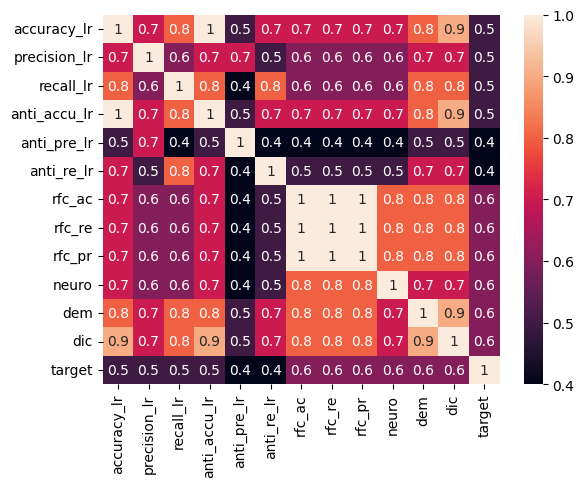

In [383]:
pred_test=pd.DataFrame({"accuracy_lr":tes_lr_ac,"precision_lr":tes_lr_pre,"recall_lr":tes_lr_re,
"anti_accu_lr":tes_lr_ac_at,"anti_pre_lr":tes_lr_pr_at,"anti_re_lr":tes_lr_re_at,
"rfc_ac":tes_rfc_ac,"rfc_re":tes_rfc_re,"rfc_pr":tes_rfc_pr,"neuro":tes_net,
"dem":tes_dem,"dic":tes_dic,"target":np.array(y_test).reshape(1,-1)[0]})
sns.heatmap(pred_test.corr().round(1),annot=True)

In [373]:
make_table(y_test,X_test)

218/218 [==============================] - 0s 1ms/step


,precision,accuracy,recall,specificity
rfc_ac,0.817516,0.823074,0.832282,0.813847
rfc_re,0.814254,0.820921,0.831995,0.809825
rfc_pr,0.815946,0.820204,0.827408,0.812985
neuro,0.778654,0.803702,0.849197,0.758115
democracy,0.803786,0.789640,0.766915,0.812410
dictatorship,0.800362,0.784905,0.759748,0.810112
accuracy_lr,0.763082,0.762089,0.760894,0.763286
anti_accu_lr,0.763082,0.762089,0.760894,0.763286
recall_lr,0.708931,0.737839,0.807913,0.667624
precision_lr,0.829551,0.712010,0.534404,0.889974


In [335]:
great_lr_ac=lr_ac.predict(X_great)
great_lr_pre=lr_pre.predict(X_great)
great_lr_re=lr_re.predict(X_great)
great_lr_ac_at=lr_ac_at.predict(X_great)
great_lr_pr_at=lr_pr_at.predict(X_great)
great_lr_re_at=lr_re_at.predict(X_great)
great_rfc_ac=rfc_ac.predict(X_great)
great_rfc_re=rfc_re.predict(X_great)
great_rfc_pr=rfc_pr.predict(X_great)
great_net=history.model.predict(X_great).round().astype("int64").reshape(1,-1)[0]
great_dic=voting.predict(X_great)
great_dem=voting_soft.predict(X_great)

673/673 [==============================] - 1s 2ms/step


In [306]:
tes_dem

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

<AxesSubplot: >

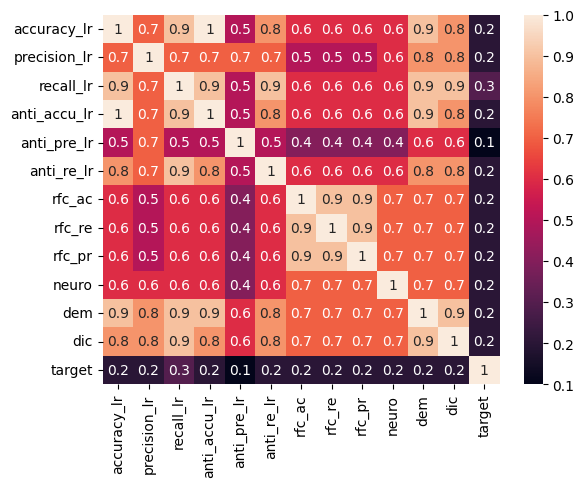

In [347]:
pred_great=pd.DataFrame({"accuracy_lr":great_lr_ac,"precision_lr":great_lr_pre,"recall_lr":great_lr_re,
"anti_accu_lr":great_lr_ac_at,"anti_pre_lr":great_lr_pr_at,"anti_re_lr":great_lr_re_at,
"rfc_ac":great_rfc_ac,"rfc_re":great_rfc_re,"rfc_pr":great_rfc_pr,"neuro":great_net,
"dem":great_dem,"dic":great_dic,"target":np.array(y_great).reshape(1,-1)[0]})
sns.heatmap(pred_great.corr().round(1),annot=True)

In [388]:
pred_test.corr().sort_values("target",ascending=False)["target"]

target          1.000000
rfc_ac          0.646246
rfc_re          0.641987
rfc_pr          0.640465
neuro           0.609882
dem             0.579910
dic             0.570567
accuracy_lr     0.524182
anti_accu_lr    0.524182
recall_lr       0.480319
precision_lr    0.453971
anti_re_lr      0.421894
anti_pre_lr     0.371530
Name: target, dtype: float64

In [337]:
make_table(y_great,X_great)

673/673 [==============================] - 1s 2ms/step


,precision,accuracy,recall,specificity
democracy,0.439916,0.651711,0.548427,0.696592
dictatorship,0.439424,0.650595,0.546471,0.696001
recall_lr,0.525609,0.649944,0.537319,0.715918
neuro,0.399655,0.647945,0.546281,0.686753
rfc_re,0.404703,0.644969,0.539915,0.686446
precision_lr,0.335878,0.644458,0.547681,0.673625
rfc_pr,0.405196,0.644179,0.538361,0.686197
rfc_ac,0.415661,0.643528,0.536128,0.687989
anti_re_lr,0.520931,0.641343,0.525329,0.710792
accuracy_lr,0.497045,0.638600,0.522589,0.703620


In [74]:
y_great.mean()

target    0.377627
dtype: float64

In [62]:
lr_re_at.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=0.001, class_weight={0: 1, 1: 1.25}, max_iter=1000,
                   n_jobs=-1, random_state=42, solver='saga')>

[[2833  648]
 [ 585 2903]]


<AxesSubplot: >

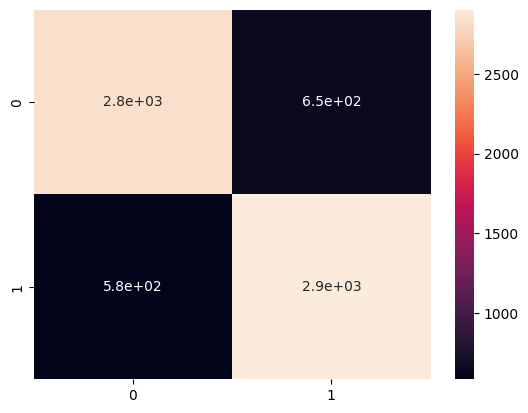

In [357]:
cm_anti=confusion_matrix(y_true=y_test,y_pred=rfc_ac.predict(X_test))
print(cm_anti)
sns.heatmap(cm_anti,annot=True)

[[3276  205]
 [2226 1262]]


<AxesSubplot: >

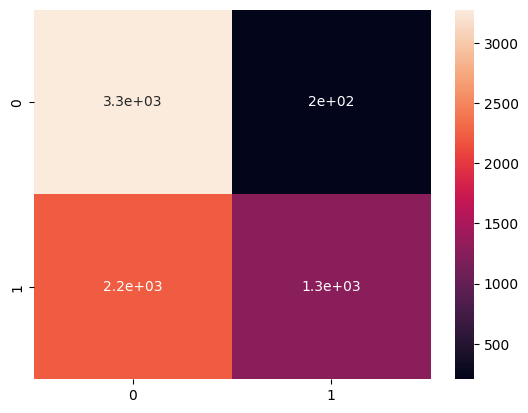

In [375]:
cm_anti=confusion_matrix(y_true=y_test,y_pred=lr_pr_at.predict(X_test))
print(cm_anti)
sns.heatmap(cm_anti,annot=True)

218/218 [==============================] - 0s 2ms/step
[[2639  842]
 [ 526 2962]]


<AxesSubplot: >

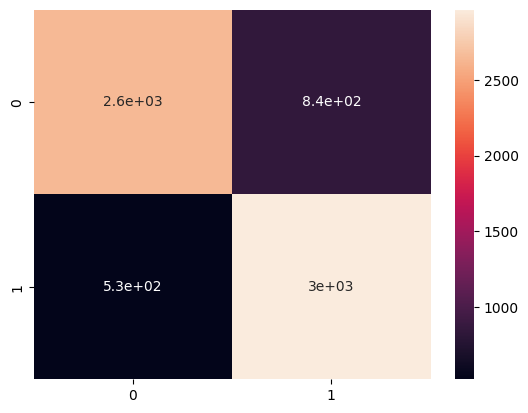

In [374]:
cm_anti=confusion_matrix(y_true=y_test,y_pred=history.model.predict(X_test).round())
print(cm_anti)
sns.heatmap(cm_anti,annot=True)

In [310]:
cr_lr_ac=(tes_lr_ac==np.array(y_test["target"])).astype("int")
cr_lr_pre=(tes_lr_pre==np.array(y_test["target"])).astype("int")
cr_lr_re=(tes_lr_re==np.array(y_test["target"])).astype("int")
cr_lr_ac_at=(tes_lr_ac_at==np.array(y_test["target"])).astype("int")
cr_lr_pr_at=(tes_lr_pr_at==np.array(y_test["target"])).astype("int")
cr_lr_re_at=(tes_lr_re_at==np.array(y_test["target"])).astype("int")
cr_rfc_ac=(tes_rfc_ac==np.array(y_test["target"])).astype("int")
cr_rfc_re=(tes_rfc_re==np.array(y_test["target"])).astype("int")
cr_rfc_pr=(tes_rfc_pr==np.array(y_test["target"])).astype("int")
cr_net=(tes_net==np.array(y_test["target"])).astype("int")
cr_dem=(tes_dem==np.array(y_test["target"])).astype("int")
cr_dic=(tes_dic==np.array(y_test["target"])).astype("int")


<AxesSubplot: >

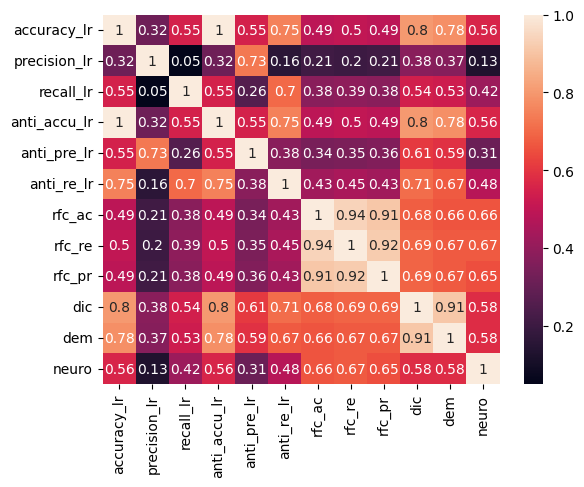

In [348]:
pred_test=pd.DataFrame({"accuracy_lr":cr_lr_ac,"precision_lr":cr_lr_pre,"recall_lr":cr_lr_re,
"anti_accu_lr":cr_lr_ac_at,"anti_pre_lr":cr_lr_pr_at,"anti_re_lr":cr_lr_re_at,
"rfc_ac":cr_rfc_ac,"rfc_re":cr_rfc_re,"rfc_pr":cr_rfc_pr,"dic":cr_dic,"dem":cr_dem,"neuro":cr_net})
sns.heatmap(pred_test.corr().round(2),annot=True)

In [5]:
X_train_net,X_valid,y_train_net,y_valid=train_test_split(X_train,y_train,test_size=.2,random_state=42)

In [70]:
model=keras.Sequential([
    layers.Dense(50,activation="relu",input_shape=[25]),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(40,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(30,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(20,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(10,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(1,activation="sigmoid"),
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["binary_accuracy"]
)

early_stopping=keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True
)

history= model.fit(
    X_train_net,y_train_net,
    validation_data=(X_valid,y_valid),
    batch_size=2000,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0
)
history_df = pd.DataFrame(history.history)

history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))


ValueError: in user code:

    File "c:\Users\Joni\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Joni\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Joni\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Joni\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 998, in train_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "c:\Users\Joni\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py", line 1092, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "c:\Users\Joni\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\compile_utils.py", line 577, in update_state
        self.build(y_pred, y_true)
    File "c:\Users\Joni\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\compile_utils.py", line 483, in build
        self._metrics = tf.__internal__.nest.map_structure_up_to(
    File "c:\Users\Joni\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\compile_utils.py", line 631, in _get_metric_objects
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "c:\Users\Joni\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\compile_utils.py", line 631, in <listcomp>
        return [self._get_metric_object(m, y_t, y_p) for m in metrics]
    File "c:\Users\Joni\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\compile_utils.py", line 650, in _get_metric_object
        metric_obj = metrics_mod.get(metric)
    File "c:\Users\Joni\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\metrics\__init__.py", line 181, in get
        return deserialize(str(identifier))
    File "c:\Users\Joni\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\metrics\__init__.py", line 136, in deserialize
        return deserialize_keras_object(
    File "c:\Users\Joni\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\utils\generic_utils.py", line 769, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown metric function: binary_precision. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


In [247]:
totalpred_data=pd.concat([X_train,pd.DataFrame(pre_lr_pre),pd.DataFrame(preds_net)],axis=1)

In [248]:
X_train_new,X_valid_new,y_train_new,y_valid_new=train_test_split(totalpred_data,y_train,test_size=.2,random_state=42)

Best Validation Loss: 0.4133
Best Validation Accuracy: 0.8066


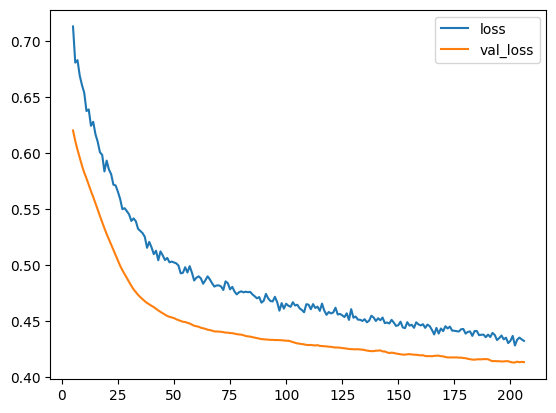

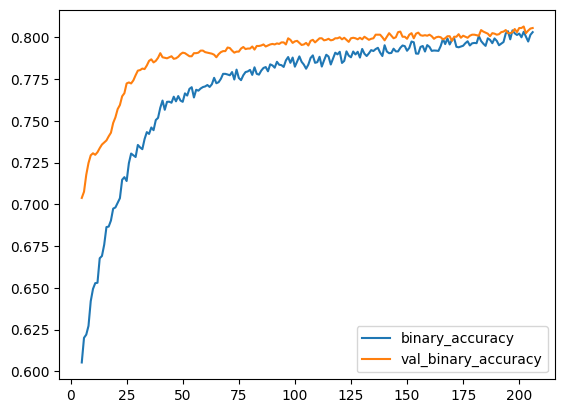

In [249]:
model=keras.Sequential([
    layers.Dense(50,activation="relu",input_shape=[27]),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(40,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(30,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(20,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(10,activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),
    layers.Dense(1,activation="sigmoid"),
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["binary_accuracy"]
)

early_stopping=keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True
)

history1= model.fit(
    X_train_new,y_train_new,
    validation_data=(X_valid_new,y_valid_new),
    batch_size=2000,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0
)
history_df = pd.DataFrame(history.history)

history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))


In [253]:
totalpred_data=pd.concat([X_great,pd.DataFrame(great_lr_re),pd.DataFrame(great_net.round().astype("int"))],axis=1)

In [243]:
great_lr_ac=lr_ac.predict(X_great)
great_lr_pre=lr_pre.predict(X_great)
great_lr_re=lr_re.predict(X_great)
great_lr_ac_at=lr_ac_at.predict(X_great)
great_lr_pr_at=lr_pr_at.predict(X_great)
great_lr_re_at=lr_re_at.predict(X_great)
great_rfc_ac=rfc_ac.predict(X_great)
great_rfc_re=rfc_re.predict(X_great)
great_rfc_pr=rfc_pr.predict(X_great)
great_net=history.model.predict(X_great).round().astype("int64").reshape(1,-1)[0]

673/673 [==============================] - 1s 2ms/step


In [242]:
pred_great=np.where(history1.model.predict(totalpred_data).round().astype("int")<0,1,history1.model.predict(totalpred_data).round().astype("int"))

673/673 [==============================] - 1s 2ms/step


In [251]:
perd_great=history1.model.predict(totalpred_data).round().astype("int")

673/673 [==============================] - 1s 1ms/step


In [252]:
accuracy_score(y_true=y_great,y_pred=pred_great)

0.6442254045006509

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,0,0,0,0,0,0,0
0,-0.959996,-1.178079,0.347272,-0.476703,0.702526,-0.428507,0.998576,-0.371366,0.388957,-1.003262,...,-0.836758,-0.975728,-0.516822,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.146446,-0.620101,-1.320863,1.564297,-0.898744,-0.455962,-0.999369,2.472738,-2.696589,-0.160684,...,-0.893635,-1.088971,1.432993,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.959996,-1.357041,1.417932,-0.471307,1.155604,-0.423737,1.006070,-0.371366,-2.677082,-0.969941,...,2.001168,0.912042,0.552249,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.959996,0.041822,1.428417,-0.487418,1.160709,-0.464092,1.008893,-0.371366,-2.682714,-0.617483,...,-0.937363,-1.155319,1.614753,1.0,0.0,1.0,1.0,0.0,1.0,1.0
4,-0.959996,0.274844,-0.600182,-0.481380,0.043906,-0.423971,-0.998345,0.197455,-2.691248,-1.004440,...,-0.633054,-0.468608,1.598778,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21503,-0.959996,1.000369,-1.326226,2.759524,-1.244675,2.111687,-1.002716,1.903918,-2.679500,1.365168,...,-0.730176,-1.001492,0.562210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21504,-0.959996,1.680559,-0.633334,-0.490665,-0.999255,-0.429609,-0.990711,2.472738,0.388566,1.594931,...,0.275592,-0.039452,-1.112012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21505,0.146446,1.939205,-1.206786,2.752822,-1.252797,2.146497,-0.992149,1.903918,0.386621,1.305360,...,0.320295,0.168292,0.070723,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21506,1.252888,1.577673,-1.021274,2.763365,-1.147359,2.114011,-0.996409,2.472738,0.406217,1.365761,...,1.064229,0.289213,-0.742645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
